,city,x,y
0,San Francisco,-2440.234574,-4226.610264
1,Los Angeles,-2609.408837,-4519.628684
2,Oklahoma City,-906.238179,-5139.532107
3,Dallas,-454.849931,-5198.958497
4,Detroit,425.360913,-4861.897489
5,Miami,1002.659670,-5686.365557
6,New York City,1263.158364,-4714.171194


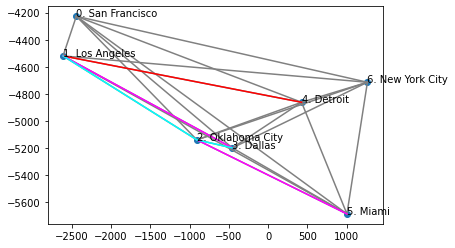

In [1]:
from IPython.core.display_functions import display
from containers.cities import CitiesGraph

path = "data/cities.csv"
graph = CitiesGraph.from_file(path, [
    "Dallas",
    "Detroit",
    "Los Angeles",
    "Miami",
    "New York City",
    "Oklahoma City",
    "San Francisco",
])
display(graph.cities.coords)
graph.fully_connect()
graph.plot_points(with_index=True)
graph.plot_connections(color="grey")
graph.plot_segment(1, 4, color='r')
graph.plot_segments([(1, 3), (2, 5)], color='magenta')
graph.plot_line([1, 2, 3], color='cyan')

In [2]:
from typing import Dict, List, Tuple


Connections = Dict[Tuple[int, int], float]
Possibility = List[int]
Possibilities = List[List[int]]


def every_possibilities(nodes: List[int]) -> Possibilities:
    if len(nodes) == 1:
        return [nodes]

    possibilities = []
    for i, item in enumerate(nodes):
        sub_nodes = nodes.copy()
        sub_nodes.pop(i)
        sub_possibilities = every_possibilities(sub_nodes)
        possibilities += [
            [item] + sub_possibility
            for sub_possibility in sub_possibilities
        ]
    return possibilities


def evaluate_possibility(possibility: Possibility, connections: Connections) -> float:
    if len(possibility) <= 1:
        return 0
    return sum([
        connections[(start, end)] if start < end else connections[(end, start)]
        for start, end in zip(possibility[:-1], possibility[1:])
    ])


def evaluate_possibilities(possibilities: Possibilities, connections: Connections) -> Dict:
    return {
        tuple(possibility): evaluate_possibility(possibility, connections)
        for possibility in possibilities
    }


def get_best_possibility(possibilities: Possibilities, connections: Connections) -> float:
    best = None
    best_weight = None
    for possibility in possibilities:
        weight = evaluate_possibility(possibility, connections)
        if (best_weight is None) or (weight < best_weight):
            best = possibility
            best_weight = weight
    return best


assert len(every_possibilities(graph.get_nodes())) == 5040

In [3]:
nodes = graph.get_nodes()
connections = graph.get_distances_by_segments()
possibilities = every_possibilities(nodes)
best_possibility = get_best_possibility(possibilities, connections)
best_possibility

[1, 0, 2, 3, 4, 6, 5]

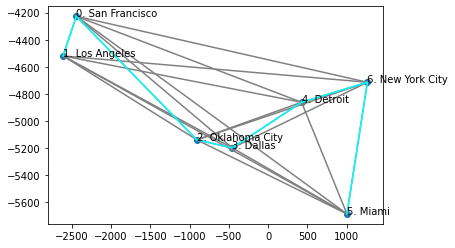

In [4]:
graph.fully_connect()
graph.plot_points(with_index=True)
graph.plot_connections(color="grey")
graph.plot_line(best_possibility, color='cyan')